In [74]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix



In [75]:
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../../Wisconsin_Database/wdbc.data', header=None)
df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':True,'B':False})
print(df.shape)

(569, 32)


In [76]:
X = df[cols[2:]]
y = df[cols[1]]

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)
print('X_train: {}, X_test: {}'.format(str(X_train.shape), str(X_test.shape)))
print('Y_train: {}, Y_test: {}'.format(str(y_train.shape), str(y_test.shape)))
scaler = StandardScaler()
scaler.fit(X_train)
# Scale both X_train and X_test
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

col_names=df.columns[2:]
scaled_df = pd.DataFrame(X_train, columns=col_names)
#scaled_df.describe().T

X_train: (426, 30), X_test: (143, 30)
Y_train: (426,), Y_test: (143,)


In [77]:
print(y_train)

287    False
512     True
402    False
446     True
210     True
       ...  
71     False
106    False
270    False
435     True
102    False
Name: Diagnosis, Length: 426, dtype: bool


In [78]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)


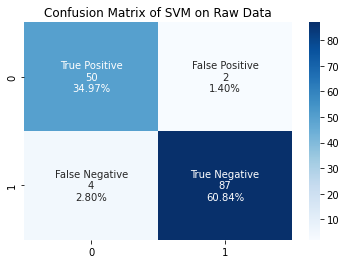

In [81]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

data = np.array([[tp, fp],[fn, tn]])
group_names = ['True Positive', 'False Positive', 'False Negative', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                data.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     data.flatten()/np.sum(data)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


labels = np.asarray(labels).reshape(2,2)
sn.heatmap(data, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix of SVM on Raw Data")
plt.show()


In [80]:
print(sum(y_test.values == y_pred))
print(len(y_pred))
print(sum(y_test.values == y_pred) / len(y_pred))


137
143
0.958041958041958
